<a href="https://colab.research.google.com/github/nautiism/fin_papers_done/blob/master/ActorCriticTradeBot/Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import math, random
import numpy as np
import pandas as pd
import gym
from nsepy import get_history
from datetime import date

import torch
import torch.nn as nn
import torch.optim as optim
import torch.autograd as autograd
import torch.nn.functional as F
from torch.distributions import Categorical

In [0]:
torch.manual_seed(42)

In [0]:
import matplotlib.pyplot as plt

In [0]:
try:
    rel = pd.read_csv('rel.csv')
    rel.index =  pd.to_datetime(rel.Date)
    rel.drop(['Date','Symbol'],axis=1,inplace=True)
    sbi = pd.read_csv('sbi.csv')
    sbi.index =  pd.to_datetime(sbi.Date)
    sbi.drop(['Date','Symbol'],axis=1,inplace=True)
except:
    rel = get_history(symbol='RELIANCE',start=date(2014,1,1),end=date(2019,1,1))
    rel.to_csv('rel.csv')
    sbi = get_history(symbol='SBIN',start=date(2014,1,1),end=date(2019,1,1))
    sbi.to_csv('sbi.csv')

In [0]:
ro = rel['Open']
rc = rel['Close']
so = sbi['Open']
sc = sbi['Close']

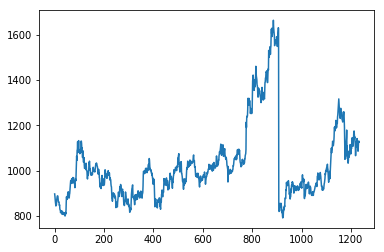

In [0]:
plt.plot(range(0, len(ro)), ro)

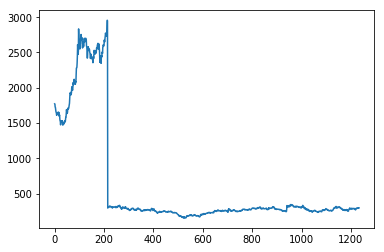

In [0]:
plt.plot(range(0, len(so)), so)

In [0]:
#looks like a stock split
# https://economictimes.indiatimes.com/markets/stocks/news/state-bank-of-india-gains-after-110-stock-split-comes-into-effect/articleshow/45216968.cms?from=mdr 
# In 1:10

#Find stock split date
prev = sbi.loc[sbi.index[0]]['Close']
for date in sbi.index[1:]:
    if prev > 7 * sbi.loc[date]['Close']:
        print(date)
        break
    prev = sbi.loc[date]['Close']
so.loc[:'2014-11-19'] = so.loc[:'2014-11-19']/10
sc.loc[:'2014-11-19'] = sc.loc[:'2014-11-19']/10

2014-11-20 00:00:00


/home/nautiyogi/anaconda3/envs/my_env/lib/python3.7/site-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


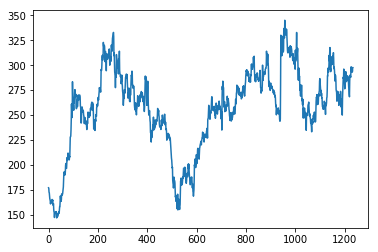

In [0]:
plt.plot(range(0, len(so)), so)
#Looks good now

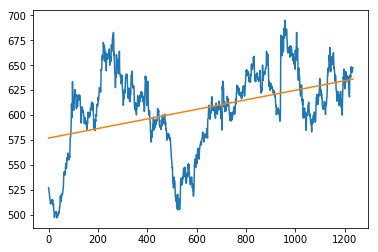

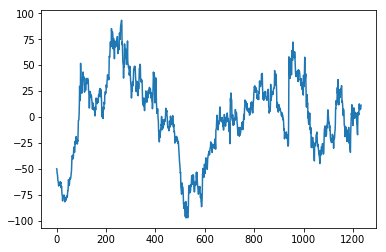

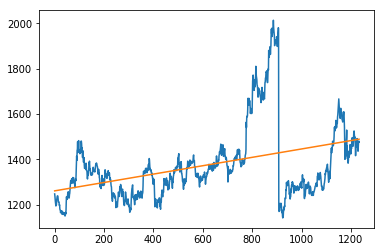

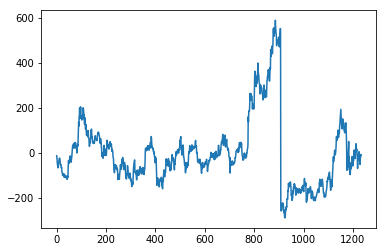

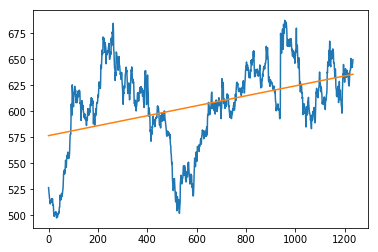

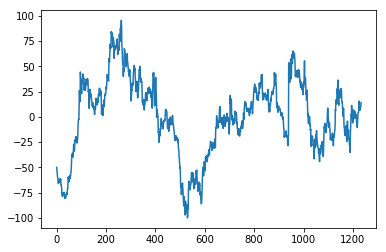

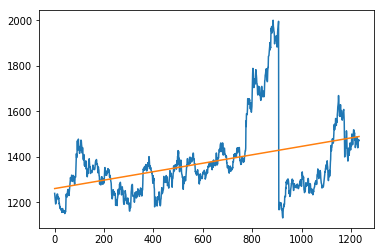

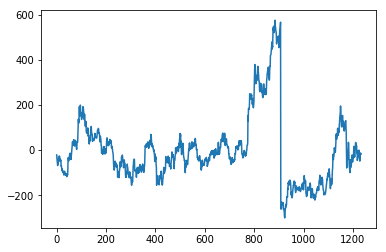

In [0]:
#Need to detred the data
from pandas import datetime
from sklearn.linear_model import LinearRegression

def detrend(series):
    X = [i for i in range(0, len(series))]
    X = np.reshape(X, (len(X), 1))
    y = series.values
    model = LinearRegression()
    model.fit(X, y)
    trend = model.predict(X)
    return [y[i]-trend[i] for i in range(0, len(series))],trend

def plot_detrend(y,trend,detrend):
    plt.plot(y)
    plt.plot(trend)
    plt.show()
    plt.plot(detrend)
    plt.show()
    
detrend_so,trend = detrend(so)
plot_detrend(so.values,trend,detrend_so)
detrend_ro,trend = detrend(ro)
plot_detrend(ro.values,trend,detrend_ro)
ro = pd.Series(detrend_ro,index=ro.index) 
so = pd.Series(detrend_so,index=so.index)

detrend_sc,trend = detrend(sc)
plot_detrend(sc.values,trend,detrend_sc)
detrend_rc,trend = detrend(rc)
plot_detrend(rc.values,trend,detrend_rc)
rc = pd.Series(detrend_rc,index=rc.index) 
sc = pd.Series(detrend_sc,index=sc.index)

In [0]:
#have negatives so shift up just for a more handsome output
#add 350 to all to avoid negative values
so+=350
ro+=350
sc+=350
rc+=350
print(so.min())
print(sc.min())
print(ro.min())
print(rc.min())

252.941895276452
249.9083491113392
60.13602168395573
49.451423168236715


In [0]:
sbi.Close = sc
sbi.Open = so
rel.Close = rc
rel.Open = ro

In [0]:
#sbi.to_csv('sbi.csv')
#rel.to_csv('rel.csv')